In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
new_paths = ['../Misc/', '../src/']
[sys.path.append(d) for d in new_paths if not d in sys.path]
from misc import *
import faultdiagnosistoolbox as fdt
import sympy as sym

  \begin{align*}
    \frac{di_{a}}{dt} &= -a i_a + b c \lambda_a + b \omega \lambda_b+d
                        u_a\\
    \frac{di_{b}}{dt} &= -a i_b + b c \lambda_b + b \omega \lambda_a+d
                        u_b\\
    \frac{d\lambda_{a}}{dt} &= L_M c i_a - c \lambda_a-\omega\lambda_b\\
    \frac{d\lambda_{b}}{dt} &= L_M c i_b - c \lambda_b-\omega\lambda_a\\
    \frac{d\omega}{dt} &= -k c_f \omega + k c_t (i_a\lambda_b -
                         i_b\lambda_a) - k T_{L}\\
    y_{1} &= i_a + f_a\\
    y_{2} &= i_b + f_b\\
    y_{3} &= w    
  \end{align*}

In [2]:
modelDef = {}
modelDef['type'] = 'Symbolic'
modelDef['x'] = ['i_a','i_b','lambda_a', 'lambda_b','w',
  'di_a','di_b','dlambda_a', 'dlambda_b','dw', 'q_a', 'q_b']
modelDef['f'] = ['f_a', 'f_b']
modelDef['z'] = ['u_a', 'u_b', 'y1', 'y2', 'y3', 'Tl']
modelDef['parameters'] = ['a', 'b', 'c', 'd', 'L_M', 'k','c_f', 'c_t']

sym.var(modelDef['x'])
sym.var(modelDef['f'])
sym.var(modelDef['z'])
sym.var(modelDef['parameters'])

modelDef['rels'] = [
  -q_a + w*lambda_a,
  -q_b + w*lambda_b, 
  -di_a + -a*i_a + b*c*lambda_a + b*q_b+d*u_a,
  -di_b + -a*i_b + b*c*lambda_b + b*q_a+d*u_b,
  -dlambda_a + L_M*c*i_a - c*lambda_a-q_b, 
  -dlambda_b + L_M*c*i_b - c*lambda_b-q_a, 
  -dw + -k*c_f*w + k*c_t*(i_a*lambda_b - i_b*lambda_a) - k*Tl,
  fdt.DiffConstraint('di_a','i_a'),
  fdt.DiffConstraint('di_b','i_b'),
  fdt.DiffConstraint('dlambda_a','lambda_a'),
  fdt.DiffConstraint('dlambda_b','lambda_b'),
  -y1 + i_a + f_a,
  -y2 + i_b + f_b,
  -y3 + w]

model = fdt.DiagnosisModel( modelDef, name = 'Induction motor' )
model.Lint()

Model: Induction motor

  Type:Symbolic, dynamic

  Variables and equations
    12 unknown variables
    6 known variables
    2 fault variables
    14 equations, including 4 differential constraints

  Degree of redundancy: 2
  Degree of redundancy of MTES set: 1


  Model validation finished with 0 errors and 0 warnings.


<IPython.core.display.Javascript object>


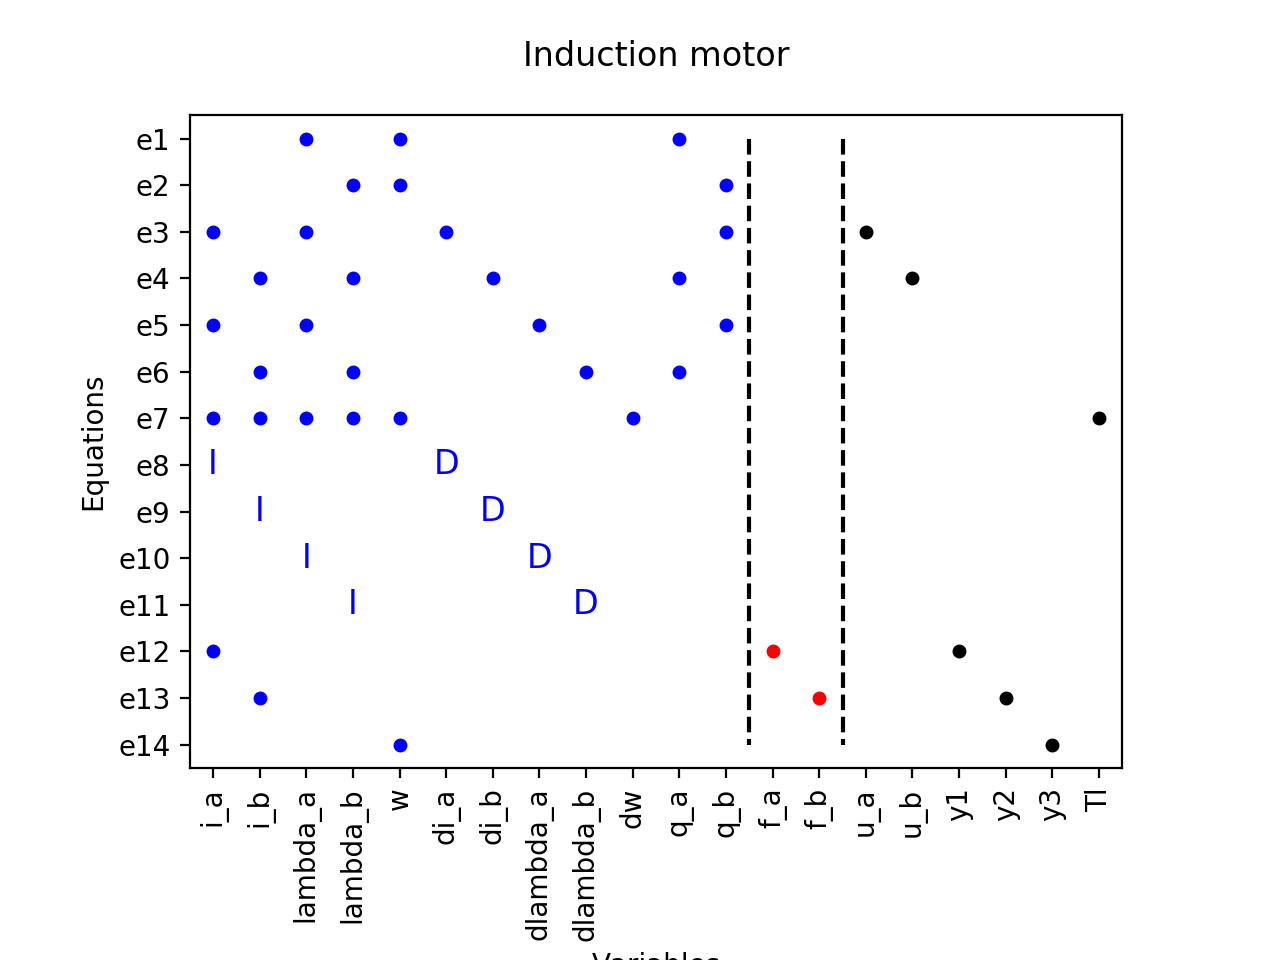

In [3]:
plt.figure(10)
model.PlotModel()

<IPython.core.display.Javascript object>


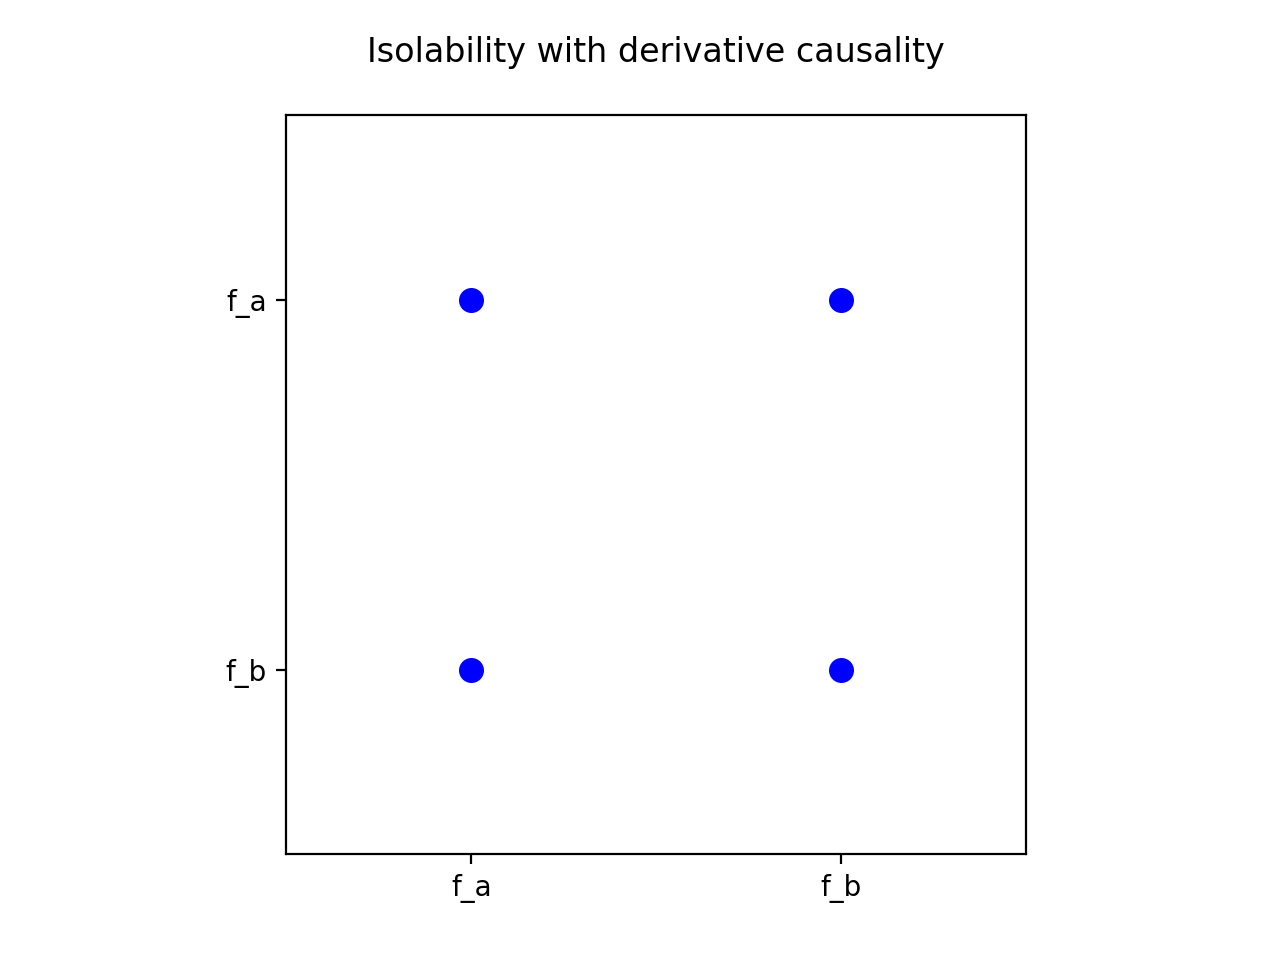

<IPython.core.display.Javascript object>


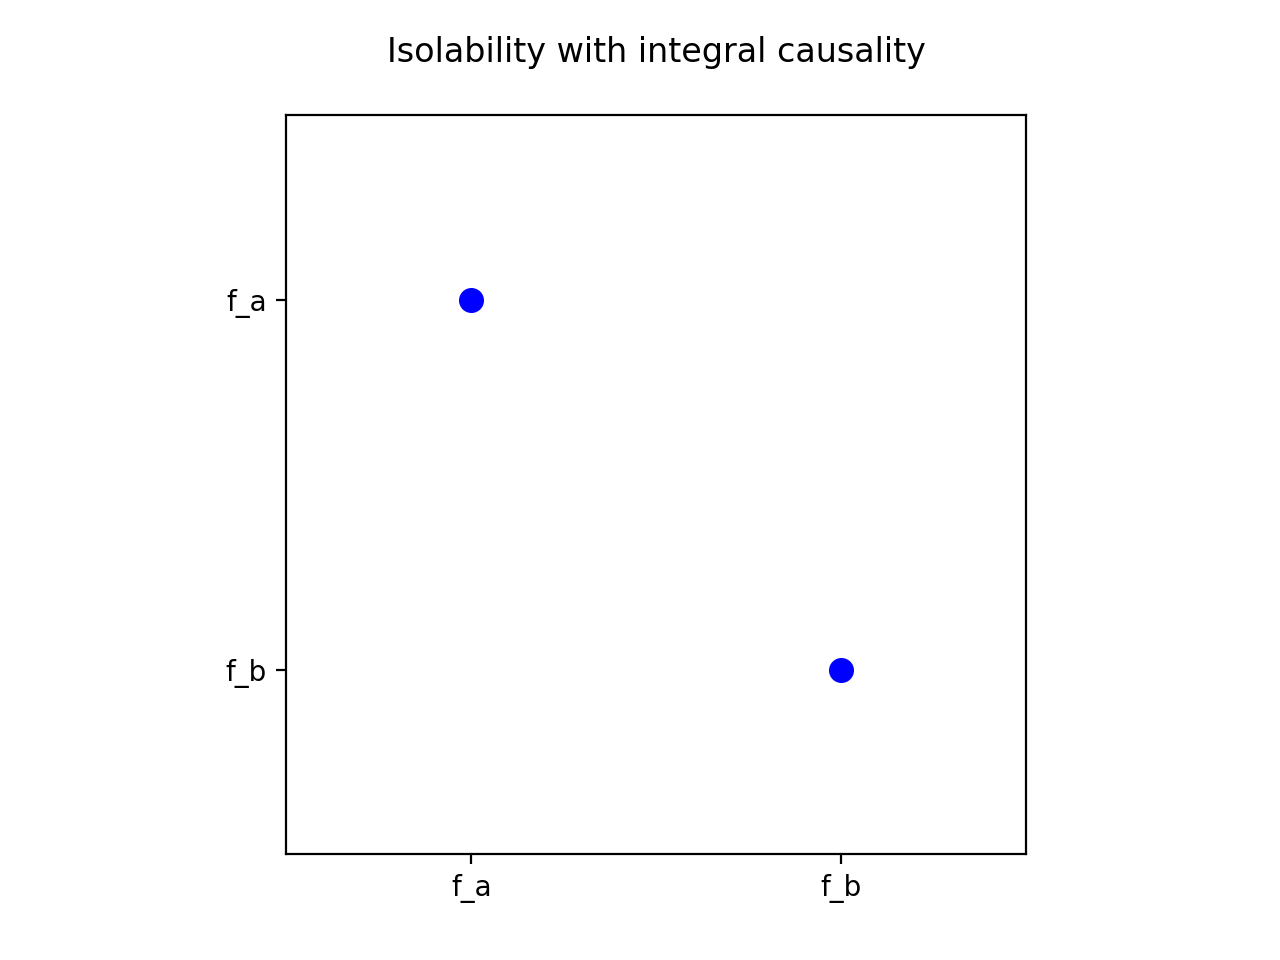

<IPython.core.display.Javascript object>


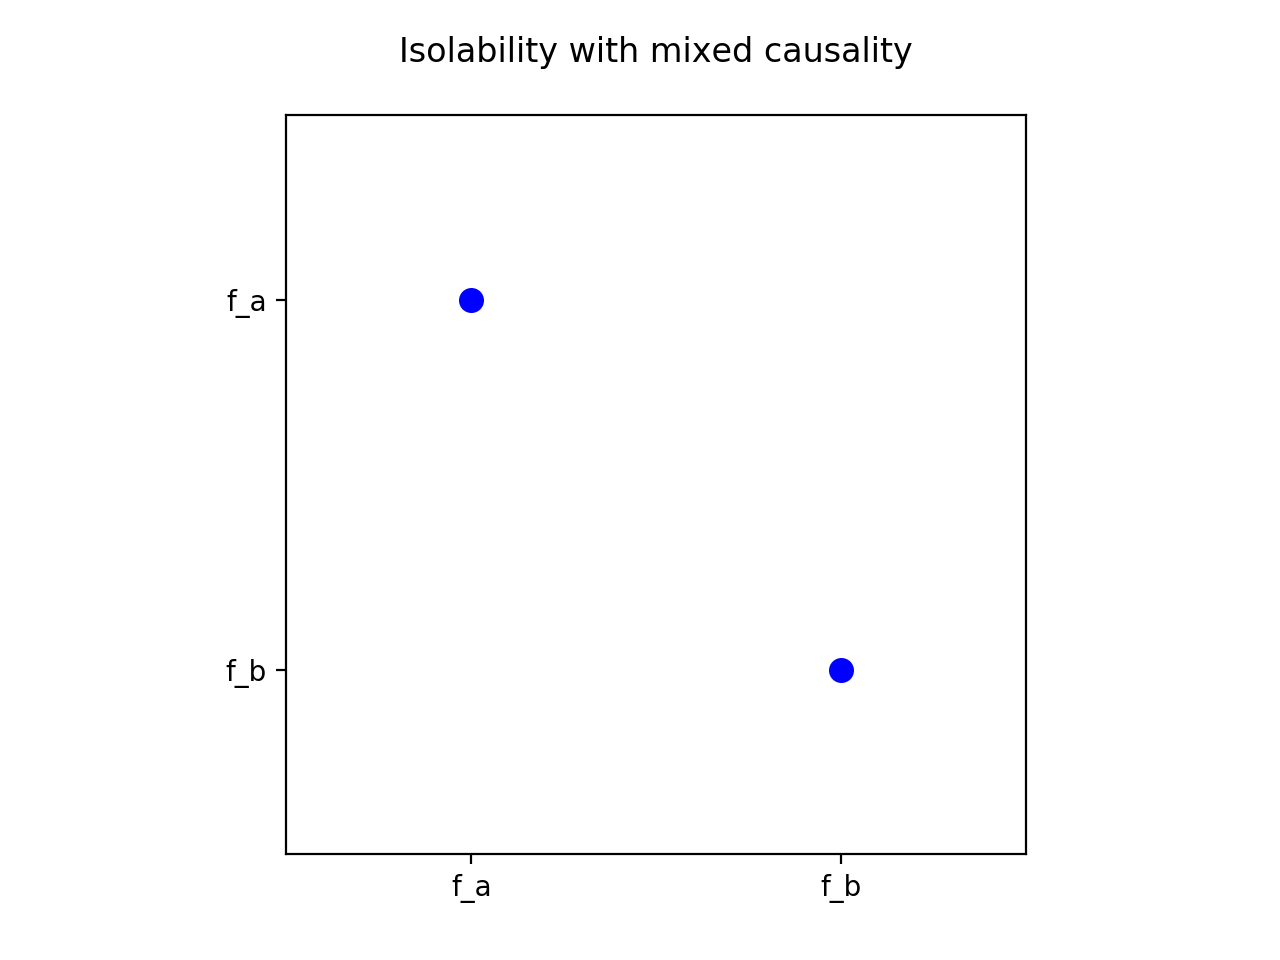

<IPython.core.display.Javascript object>


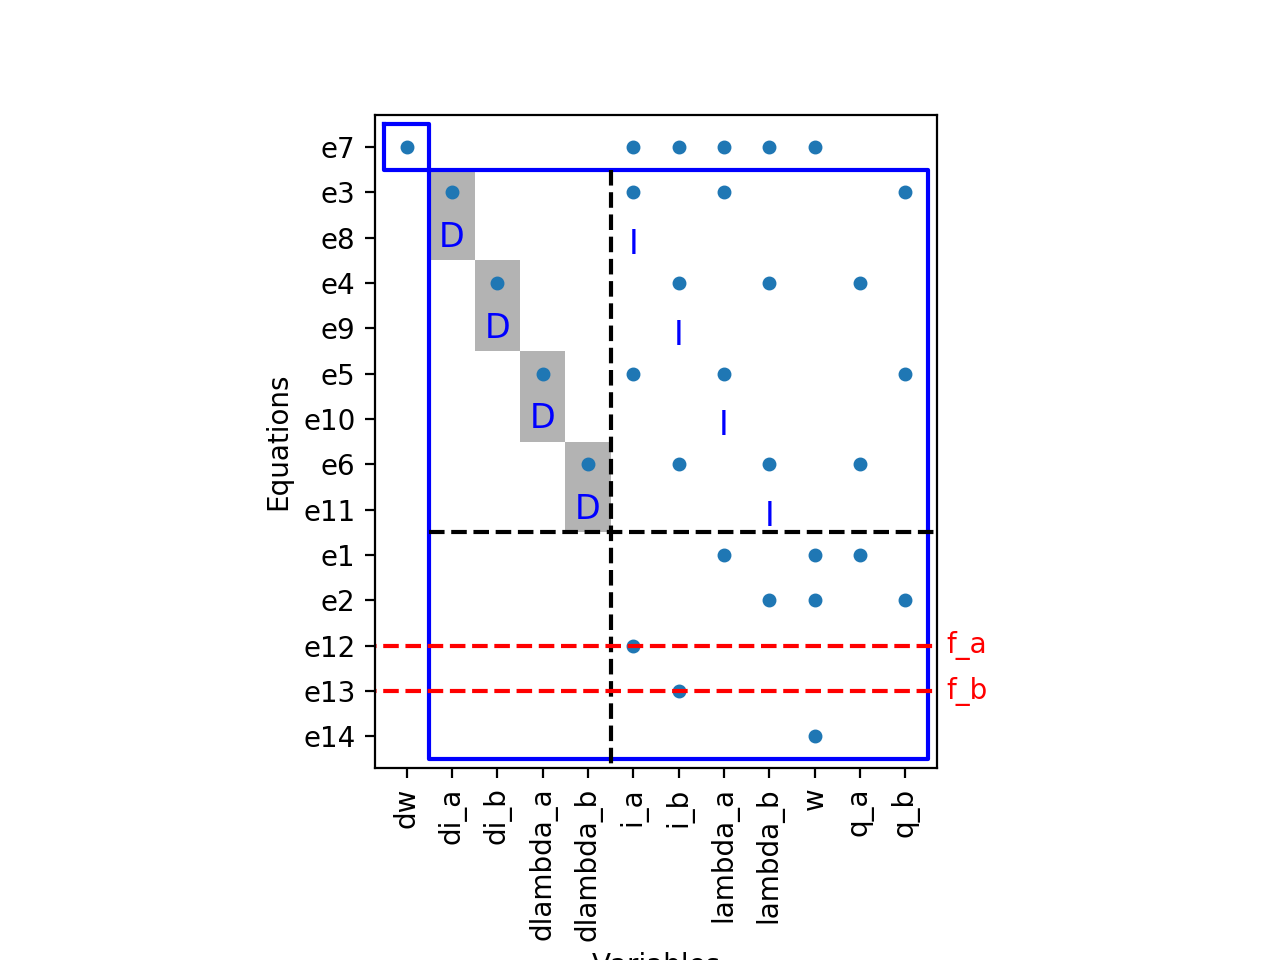

In [4]:
plt.figure(20)
model.IsolabilityAnalysis(plot=True, causality='der')
plt.title('Isolability with derivative causality'); 

plt.figure(21)
model.IsolabilityAnalysis(plot=True, causality='int')
plt.title('Isolability with integral causality'); 

plt.figure(22)
model.IsolabilityAnalysis(plot=True)
plt.title('Isolability with mixed causality'); 

plt.figure(24)
model.PlotDM(fault=True, eqclass=True)

In [6]:
msos = model.MSO()
mtes = model.MTES()